In [1]:
%pip install pandas numpy seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)


In [2]:
print('Lib versions:')
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')
print(f'Seaborn: {sns.__version__}')
print('\nPython version:')
!python3.12 --version

Lib versions:
Pandas: 2.2.3
Numpy: 2.1.1
Seaborn: 0.13.2

Python version:
Python 3.12.6


In [15]:
!wget -P data https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

--2024-10-14 16:15:00--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data/bank+marketing.zip’

bank+marketing.zip      [       <=>          ] 999.85K   810KB/s    in 1.2s    

2024-10-14 16:15:02 (810 KB/s) - ‘data/bank+marketing.zip’ saved [1023843]



In [16]:
!unzip data/bank+marketing.zip -d data

Archive:  data/bank+marketing.zip
 extracting: data/bank.zip           
 extracting: data/bank-additional.zip  


In [17]:
!unzip data/bank.zip -d data
!unzip data/bank-additional.zip -d data

Archive:  data/bank.zip
  inflating: data/bank-full.csv      
  inflating: data/bank-names.txt     
  inflating: data/bank.csv           
Archive:  data/bank-additional.zip
   creating: data/bank-additional/
  inflating: data/bank-additional/.DS_Store  
   creating: data/__MACOSX/
   creating: data/__MACOSX/bank-additional/
  inflating: data/__MACOSX/bank-additional/._.DS_Store  
  inflating: data/bank-additional/.Rhistory  
  inflating: data/bank-additional/bank-additional-full.csv  
  inflating: data/bank-additional/bank-additional-names.txt  
  inflating: data/bank-additional/bank-additional.csv  
  inflating: data/__MACOSX/._bank-additional  


In [18]:
!rm data/bank-additional.zip data/bank.zip data/bank+marketing.zip

# Loading and preparing the dataset

In [3]:
df = pd.read_csv('./data/bank-full.csv', delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Features
For the rest of the homework, you'll need to use only these columns:

age,
job,
marital,
education,
balance,
housing,
contact,
day,
month,
duration,
campaign,
pdays,
previous,
poutcome,
y

In [4]:
df = df[['age',
'job',
'marital',
'education',
'balance',
'housing',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'y']]
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


### Splitting the dataset

In [5]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df

/tmp/ipykernel_3148/2814960868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y'].map({'yes': 1, 'no': 0})


,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['y'])
y = df['y']

# 60% train + 40% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)
# 50% validation and 50% test = 20% val + 20% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

print(f"Train: {X_train.shape[0]}")
print(f"Validation: {X_val.shape[0]}")
print(f"Test: {X_test.shape[0]}")

Train: 27126
Validation: 9042
Test: 9043


In [7]:
df_full_train, X_test = train_test_split(df, test_size=0.2, random_state=1)
X_train, X_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

y_train = (X_train.y == 1).values
y_val = (X_val.y == 1).values
y_test = (X_test.y == 1).values

del X_train['y']
del X_val['y']
del X_test['y']

print(f"Train: {X_train.shape[0]}")
print(f"Validation: {X_val.shape[0]}")
print(f"Test: {X_test.shape[0]}")

Train: 27126
Validation: 9042
Test: 9043


### Q1. ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `balance`
- `day`
- `duration`
- `previous`


In [8]:
from sklearn.metrics import roc_auc_score

numerical_columns = ['balance', 'day', 'duration', 'previous']
auc_values = {}

for col in numerical_columns:
    auc = roc_auc_score(y_train, X_train[col])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -X_train[col])
    auc_values[col] = auc

print(auc_values)

# Find the variable with the highest AUC
best_feature = max(auc_values, key=auc_values.get)
best_auc = auc_values[best_feature]

print(f"Best feature: {best_feature}, AUC: {best_auc}")

{'balance': np.float64(0.5888313805382317), 'day': np.float64(0.525957882383908), 'duration': np.float64(0.8147002759670778), 'previous': np.float64(0.5985653242764153)}
Best feature: duration, AUC: 0.8147002759670778


### Q2. Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)


In [9]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [10]:
X_train_dict = X_train.to_dict(orient='records')
X_val_dict = X_val.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train_encoded = dv.fit_transform(X_train_dict)
X_val_encoded = dv.transform(X_val_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train_encoded, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [11]:
y_val_pred = model.predict_proba(X_val_encoded)[:, 1]
auc = roc_auc_score(y_val, y_val_pred)

print(f"AUC: {auc:.3f}")

AUC: 0.900


### Q3. Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

In [67]:
# from sklearn.metrics import precision_score, recall_score

# def train_and_evaluate(X_train, X_val, y_train, y_val, threshold):
#     X_train_dict = X_train.to_dict(orient='records')
#     X_val_dict = X_val.to_dict(orient='records')

#     dv = DictVectorizer(sparse=False)
#     X_train_encoded = dv.fit_transform(X_train_dict)
#     X_val_encoded = dv.transform(X_val_dict)

#     model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
#     model.fit(X_train_encoded, y_train)

#     y_val_pred = model.predict_proba(X_val_encoded)[:, 1] 
#     # auc = roc_auc_score(y_val, y_val_pred >= threshold)
#     precision = precision_score(y_val, y_val_pred >= threshold)
#     recall = recall_score(y_val, y_val_pred >= threshold)
#     # return (auc, precision, recall)
#     return (precision, recall)

In [12]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.arange(0, 1.01, 0.01)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    return df_scores

In [13]:
df_scores = confusion_matrix_dataframe(y_val, y_val_pred)
df_scores

,threshold,tp,fp,fn,tn
0,0.00,1098,7944,0,0
1,0.01,1094,7004,4,940
2,0.02,1093,5789,5,2155
3,0.03,1087,4745,11,3199
4,0.04,1068,3800,30,4144
...,...,...,...,...,...
96,0.96,30,17,1068,7927
97,0.97,25,15,1073,7929
98,0.98,21,10,1077,7934
99,0.99,11,5,1087,7939


In [14]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores

,threshold,tp,fp,fn,tn,p,r
0,0.00,1098,7944,0,0,0.121433,1.000000
1,0.01,1094,7004,4,940,0.135095,0.996357
2,0.02,1093,5789,5,2155,0.158820,0.995446
3,0.03,1087,4745,11,3199,0.186385,0.989982
4,0.04,1068,3800,30,4144,0.219392,0.972678
...,...,...,...,...,...,...,...
96,0.96,30,17,1068,7927,0.638298,0.027322
97,0.97,25,15,1073,7929,0.625000,0.022769
98,0.98,21,10,1077,7934,0.677419,0.019126
99,0.99,11,5,1087,7939,0.687500,0.010018


In [15]:
for i, threshold in enumerate(df_scores['threshold']):
    if(round(df_scores['p'][i], 2) == round(df_scores['r'][i], 2)):
        print(f'Scores intersected in threshold {threshold}, with {df_scores['p'][i]} value.')

Scores intersected in threshold 0.26, with 0.5561545372866128 value.


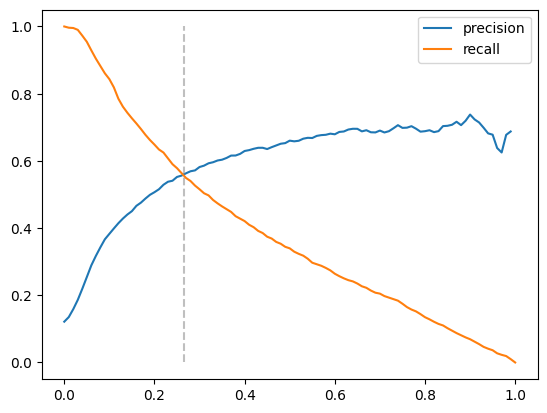

In [16]:
import matplotlib.pyplot as plt

plt.plot(df_scores.threshold, df_scores.p, label='precision')
plt.plot(df_scores.threshold, df_scores.r, label='recall')

plt.vlines(0.265, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.legend()
plt.show()

### Q4. F1 score threshold

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?


In [18]:
df_scores['f1'] = 2 * df_scores.p * df_scores.r / (df_scores.p + df_scores.r)
df_scores

,threshold,tp,fp,fn,tn,p,r,f1
0,0.00,1098,7944,0,0,0.121433,1.000000,0.216568
1,0.01,1094,7004,4,940,0.135095,0.996357,0.237930
2,0.02,1093,5789,5,2155,0.158820,0.995446,0.273935
3,0.03,1087,4745,11,3199,0.186385,0.989982,0.313709
4,0.04,1068,3800,30,4144,0.219392,0.972678,0.358029
...,...,...,...,...,...,...,...,...
96,0.96,30,17,1068,7927,0.638298,0.027322,0.052402
97,0.97,25,15,1073,7929,0.625000,0.022769,0.043937
98,0.98,21,10,1077,7934,0.677419,0.019126,0.037201
99,0.99,11,5,1087,7939,0.687500,0.010018,0.019749


In [19]:
df_scores.loc[df_scores.f1.argmax()]

threshold       0.220000
tp            686.000000
fp            611.000000
fn            412.000000
tn           7333.000000
p               0.528913
r               0.624772
f1              0.572860
Name: 22, dtype: float64

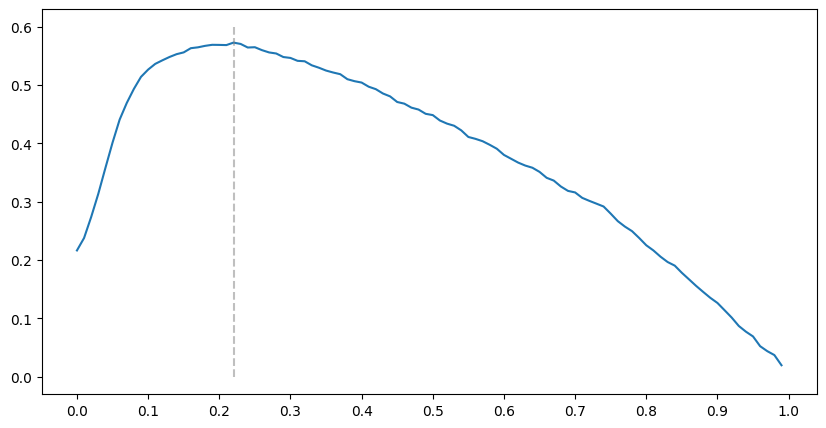

In [20]:
plt.figure(figsize=(10, 5))

plt.plot(df_scores.threshold, df_scores.f1)
plt.vlines(0.22, 0.0, 0.6, color='grey', linestyle='--', alpha=0.5)

plt.xticks(np.linspace(0, 1, 11))
plt.show()

### Q5. STD for 5-Fold CV

Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

In [25]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [32]:
scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.y.values
    y_val = df_val.y.values

    del df_train['y']
    del df_val['y']

    X_train_dict = df_train.to_dict(orient='records')
    X_val_dict = df_val.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train_encoded = dv.fit_transform(X_train_dict)
    X_val_encoded = dv.transform(X_val_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train_encoded, y_train)

    y_pred = model.predict_proba(X_val_encoded)[:, 1] 
    scores.append(roc_auc_score(y_val, y_pred))
    
scores

[np.float64(0.8992842405563055),
 np.float64(0.8990110164487815),
 np.float64(0.9111641244449282),
 np.float64(0.9078905031338849),
 np.float64(0.9119728949040351)]

In [33]:
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.906 +- 0.006


### Q6. Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

In [46]:
C_values = [0.000001, 0.001, 1]

for C in C_values:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.y.values
        y_val = df_val.y.values

        del df_train['y']
        del df_val['y']

        X_train_dict = df_train.to_dict(orient='records')
        X_val_dict = df_val.to_dict(orient='records')
        dv = DictVectorizer(sparse=False)
        X_train_encoded = dv.fit_transform(X_train_dict)
        X_val_encoded = dv.transform(X_val_dict)

        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train_encoded, y_train)

        y_pred = model.predict_proba(X_val_encoded)[:, 1] 
        scores.append(roc_auc_score(y_val, y_pred))

    print('For C = %a:\t %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

For C = 1e-06:	 0.701 +- 0.009
For C = 0.001:	 0.861 +- 0.007
For C = 1:	 0.906 +- 0.006
